In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
f=lambda x:x**3-np.log(x)-2
fp=lambda x: 3*x**2-1/x
x=np.linspace(0.1,2,100)
y0=[0]*len(x)

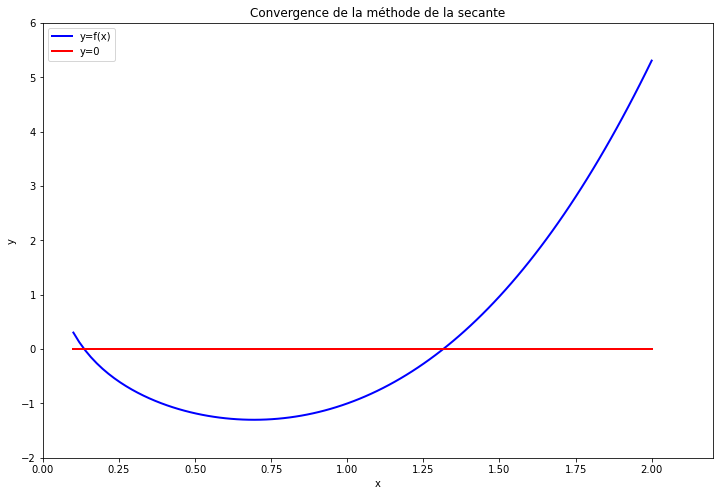

In [111]:
# create a figure and axes
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(1,1,1)   
# set up the subplots as needed
ax1.set_xlim(( 0, 2.2))            
ax1.set_ylim((-2, 6))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
#fixed
line1, = ax1.plot(x, f(x), 'b', lw=2)
line2, = ax1.plot(x, [0]*len(x), 'r', lw=2)
lignes,=ax1.plot([],[],'')
pt1, = ax1.plot([],[], 'ro', ms=10)
# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('Convergence de la méthode de la secante')
ax1.legend(['y=f(x)','y=0'])

In [83]:
def point_fixe(g, x0):
    x1 = x0
    while True:
        x1 = g(x1)
        yield x1
        if x1==g(x1):
            break

In [84]:
def newton(f,fp,x0):
    g=lambda x:x-f(x)/fp(x)
    ptfixegen=point_fixe(g,x0)
    while True:
        yield next(ptfixegen)

In [106]:
a=0.75
ntn=newton(f,fp,a)
xn_newton=[]
alpha=0
try:

    for i in range(40):
        alpha_nt=next(ntn)
        xn_newton.append(alpha_nt)
        print(str(i)+"  "+str(alpha_nt))
except :
    print("Stop iteration")

0  4.393603560136148
1  2.9836220415550496
2  2.093735018274675
3  1.58563706322487
4  1.364908266228802
5  1.3171963399684332
6  1.3149834077922549
7  1.3149787200044931
8  1.3149787199834757
Stop iteration


In [107]:
i

9

In [108]:
# animation function. This is called sequentially
xn=xn_newton
def drawframe(n):
    fig.clear
    if n==0:
        ax1.plot([a,xn_newton[0]],[f(a),0])
    else:
        ax1.plot([xn_newton[n-1],xn_newton[n]],[f(xn_newton[n-1]),0])
        pt1.set_data(xn_newton[:n],y0[:n])
    txt_title = ax1.set_title('Méthode de la secante: frame {}'.format(n))
    return (line1,line2)

In [112]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=i, interval=1500, blit=True)

In [113]:
from IPython.display import HTML
HTML(anim.to_html5_video())